In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from utils import plot_tree_boundaries

features = ['age','acutephysiologyscore']
outcome = 'actualhospitalmortality'

data = pd.read_csv('eicu_processed.csv')

x = data[features]
y = data[outcome]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

# Random Forests

In the previous example, we used bagging to randomly resample our data to generate “new” datasets. The Random Forest takes this one step further: instead of just resampling our data, we also select only a fraction of the features to include.

It turns out that this subselection tends to improve the performance of our models. The odds of an individual being very good or very bad is higher (i.e. the variance of the trees is increased), and this ends up giving us a final model with better overall performance (lower bias).

Much like the boosting technique from earlier, the `sklearn` implementation of random forests do not support missing data. Let's replace all missing data with -1, then train the model.

In [4]:
# Fill missing data with -1
data_no_nans = data.fillna(-1)

x = data_no_nans[features]
y = data_no_nans[outcome]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state =  42)

**Task:** Use [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to train a random forest with 6 estimators, max depth of 5 and max features of 1.

/Users/seanwang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/seanwang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/seanwang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/seanwang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/seanwang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/seanwang/Library/Python/3.9/lib/p

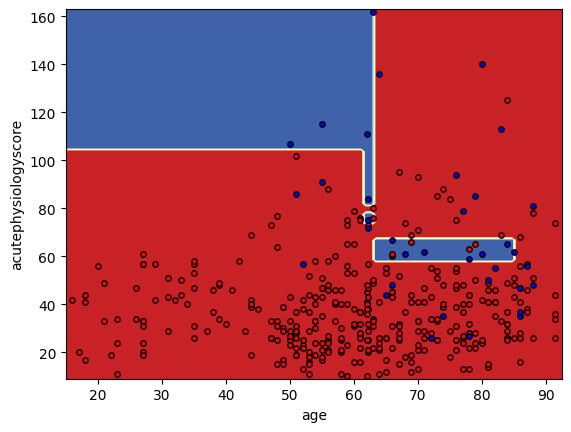

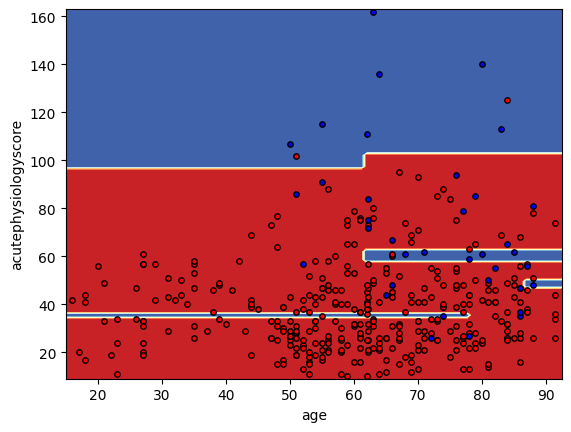

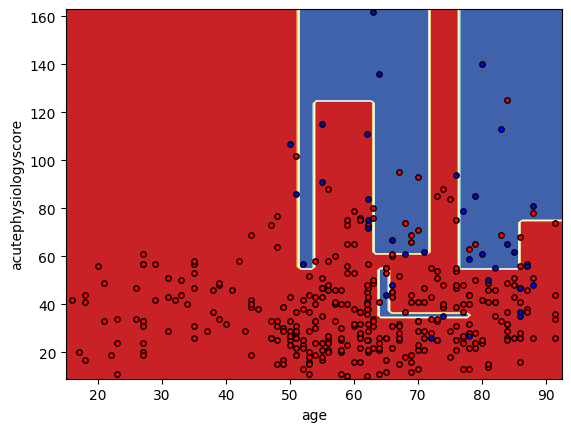

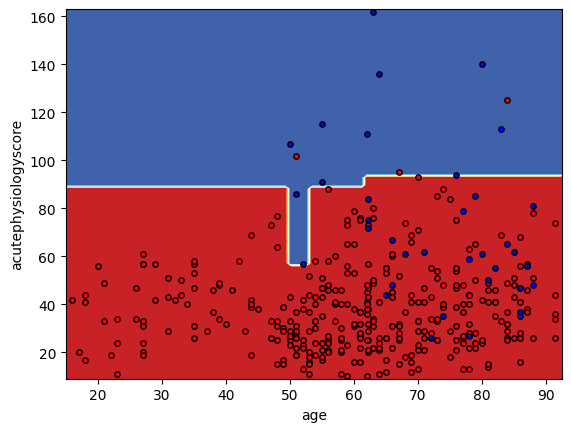

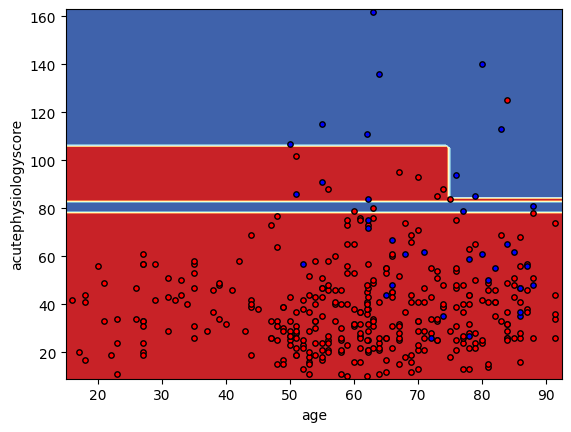

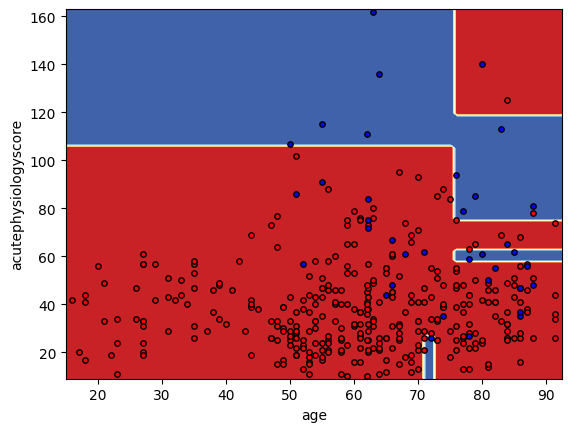

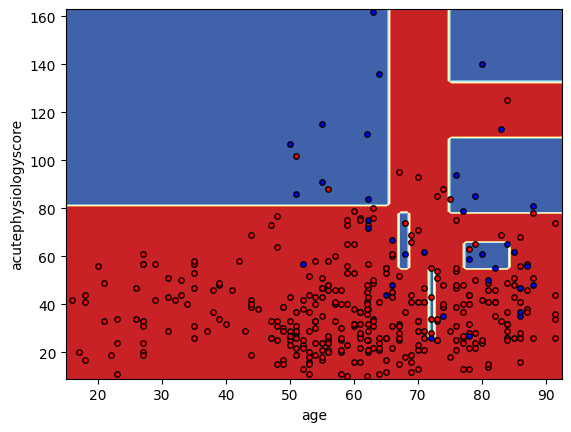

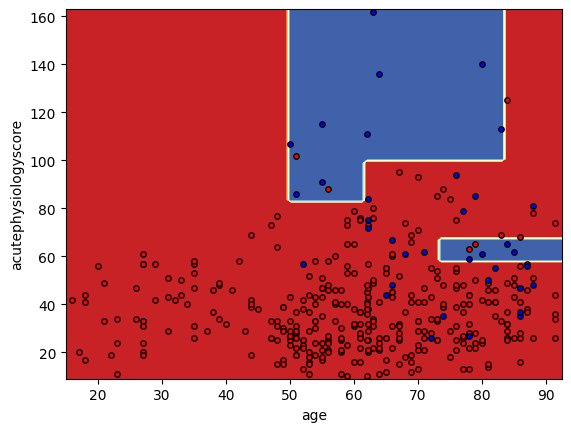

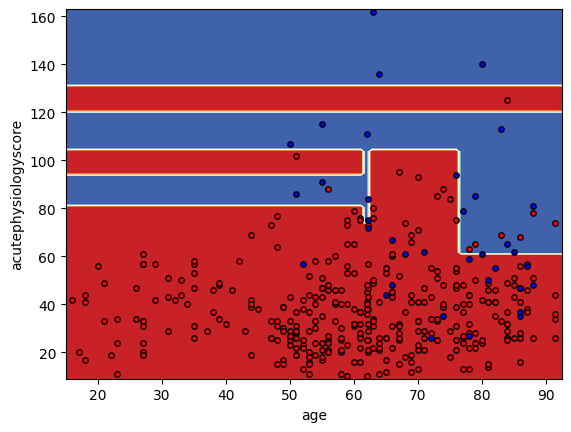

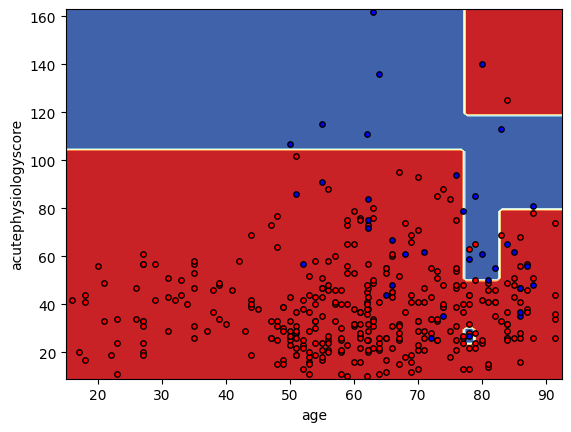

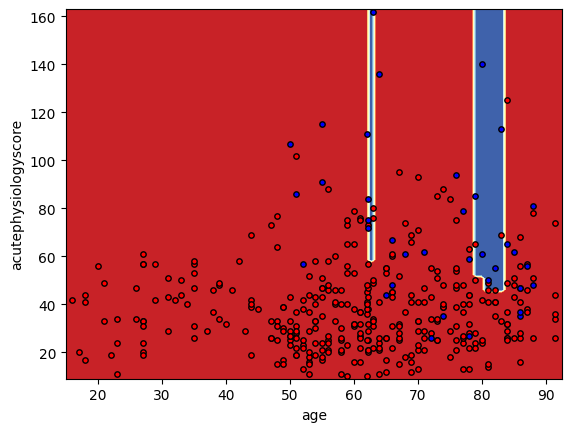

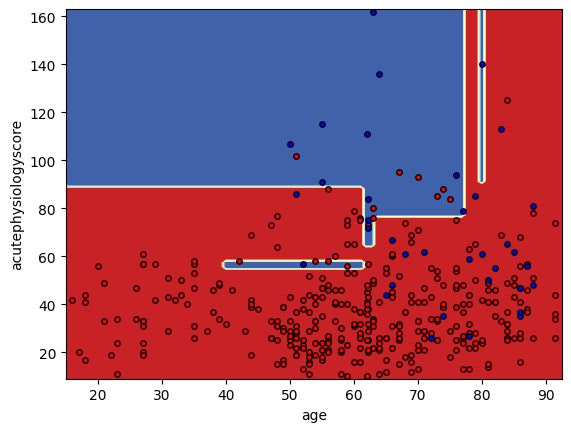

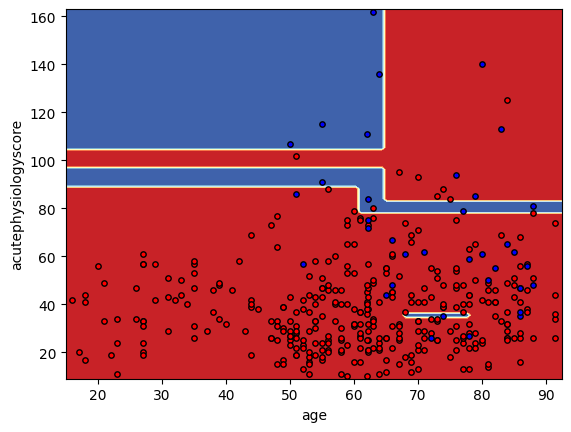

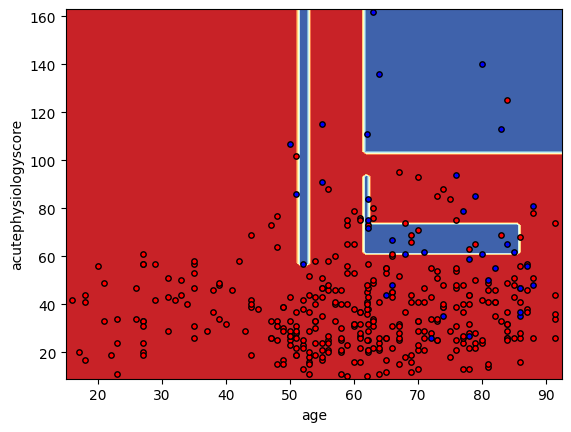

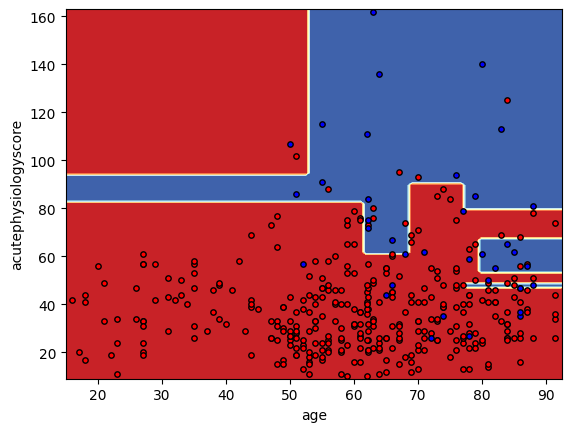

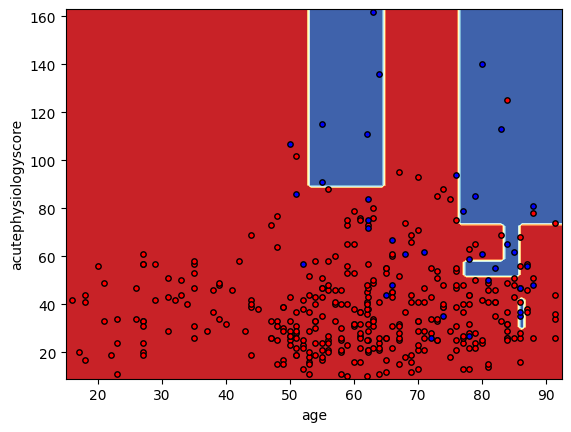

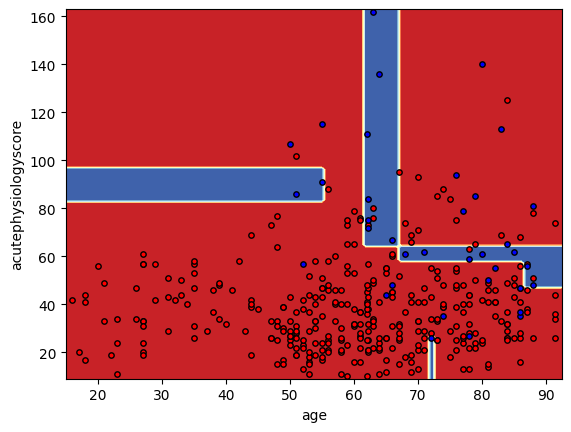

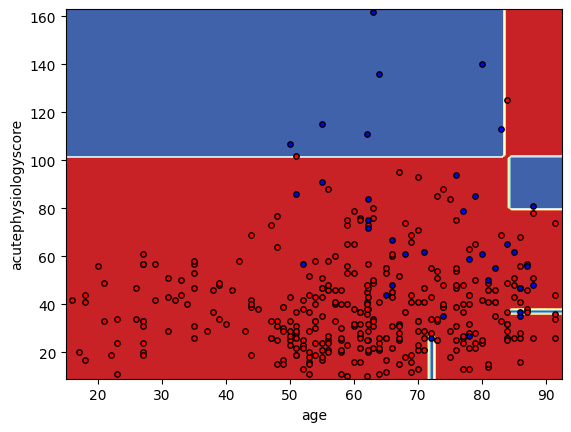

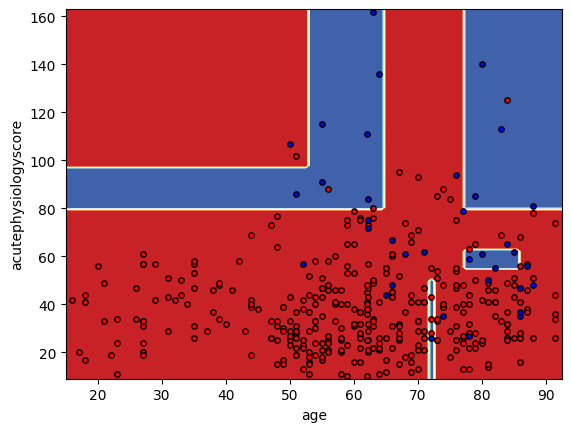

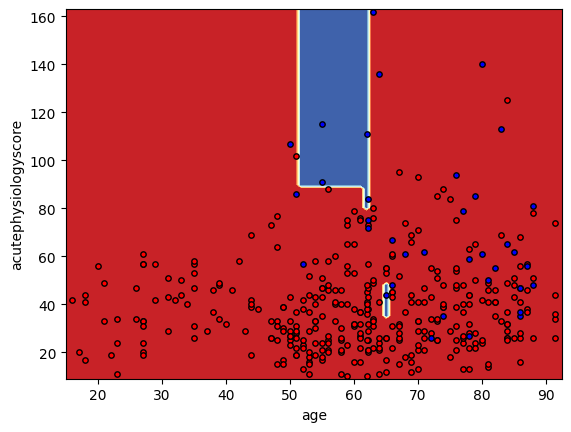

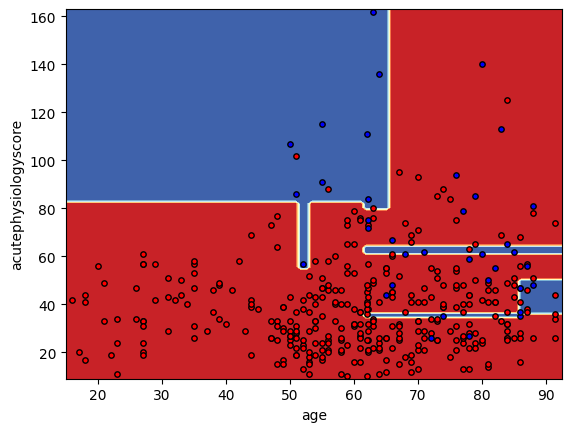

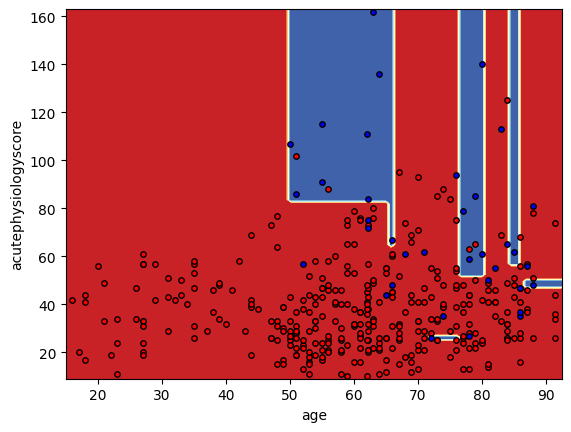

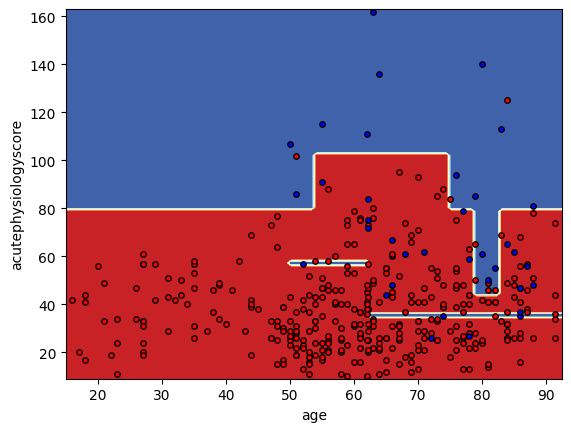

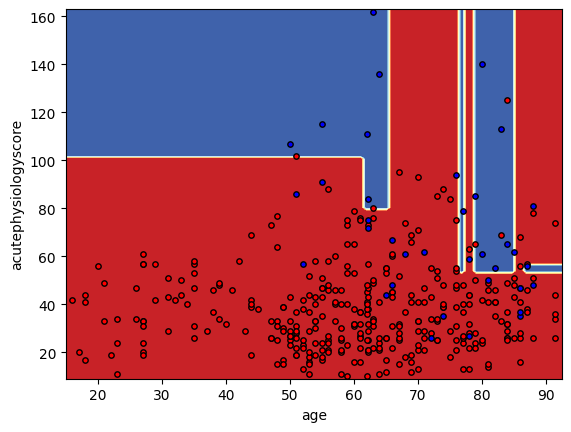

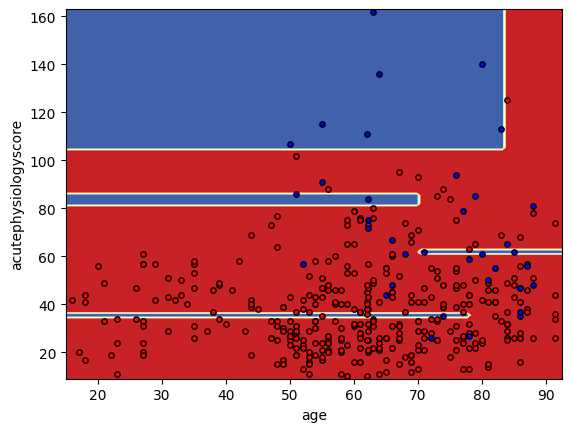

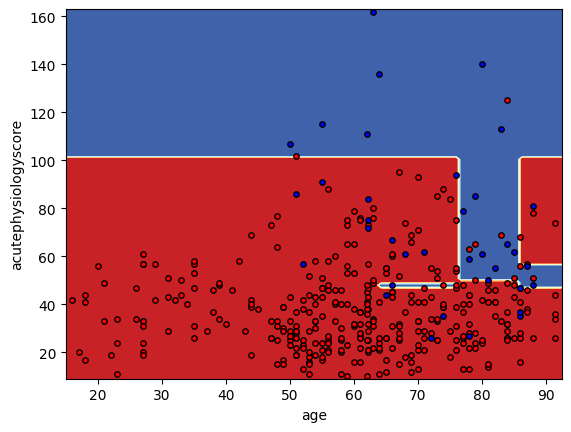

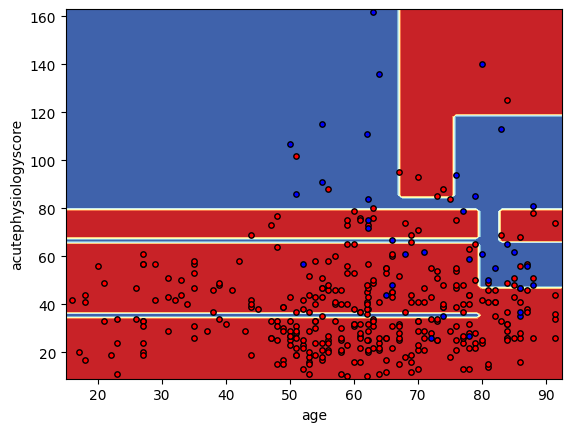

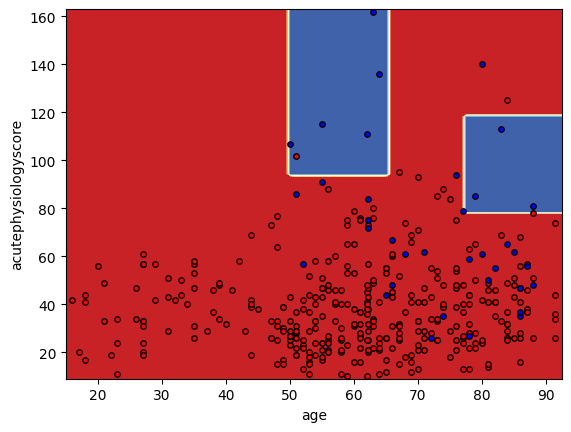

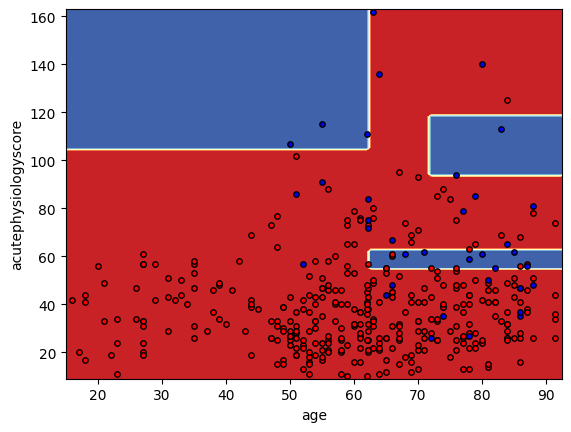

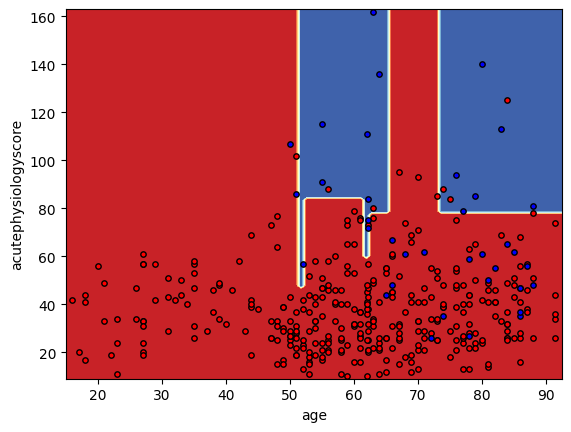

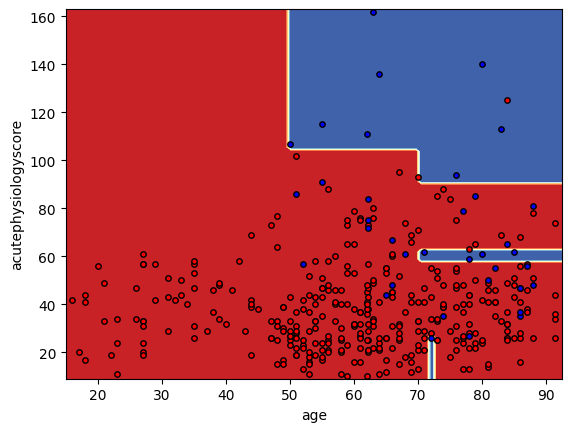

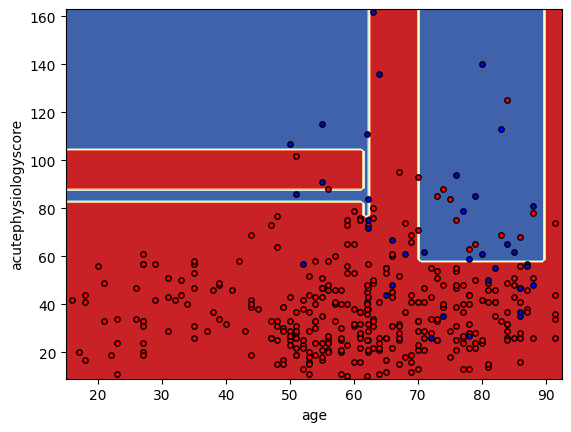

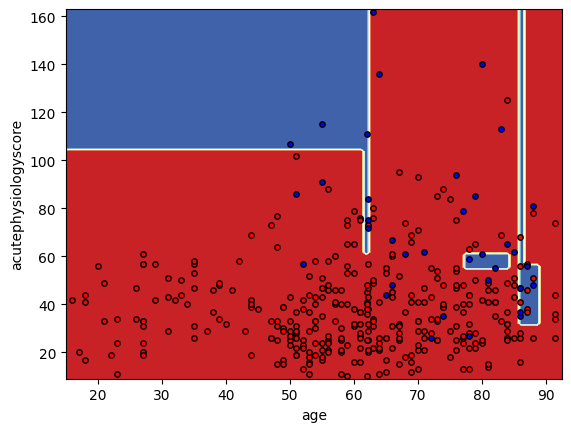

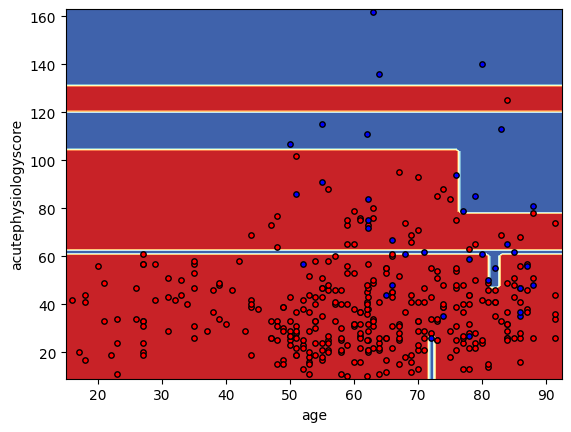

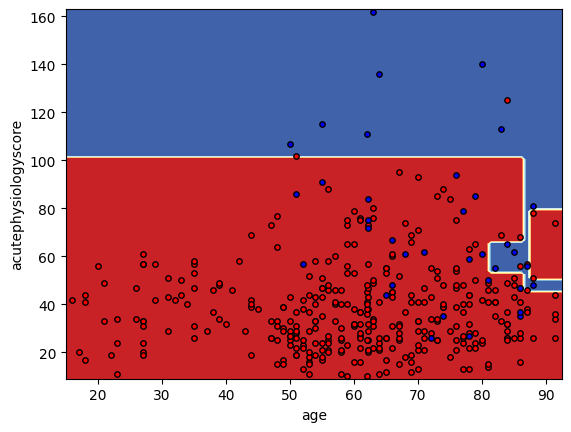

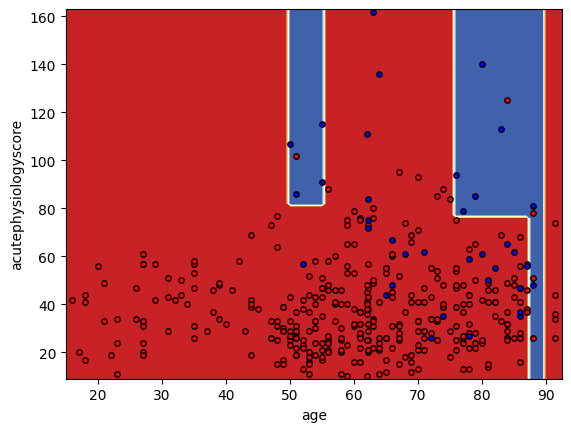

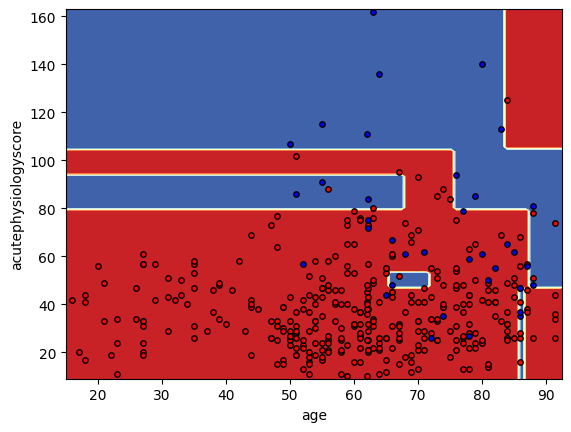

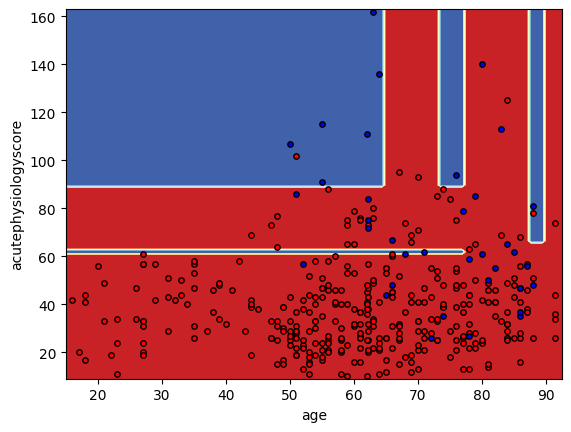

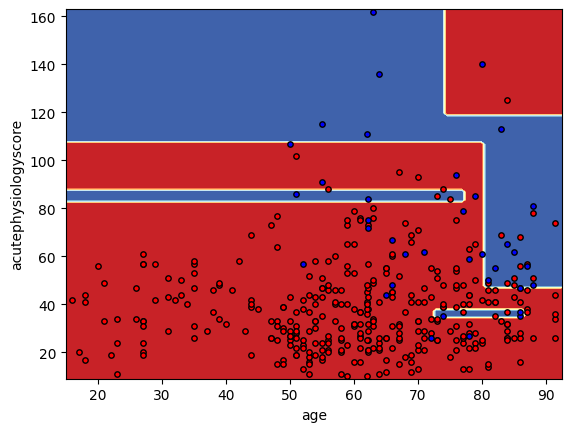

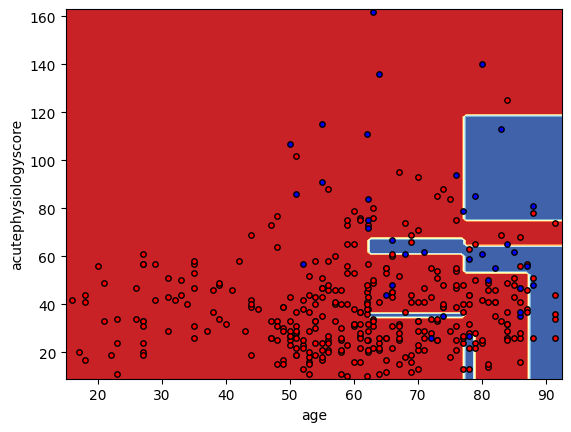

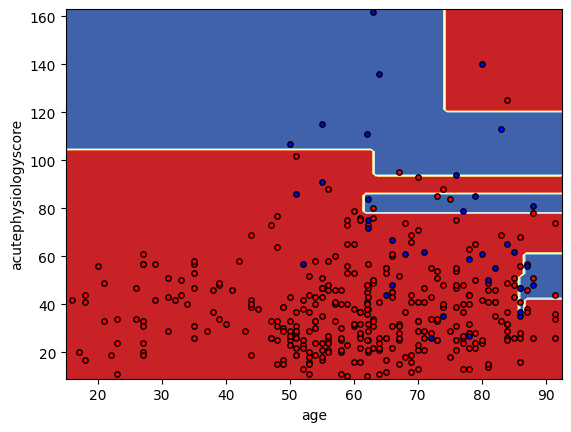

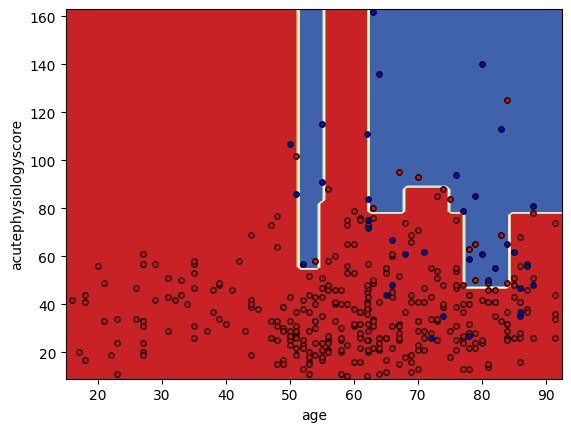

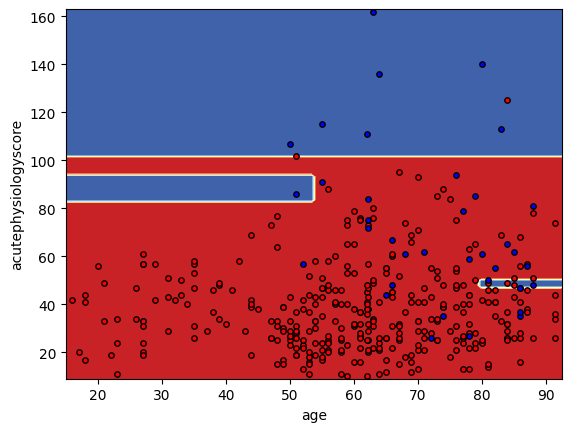

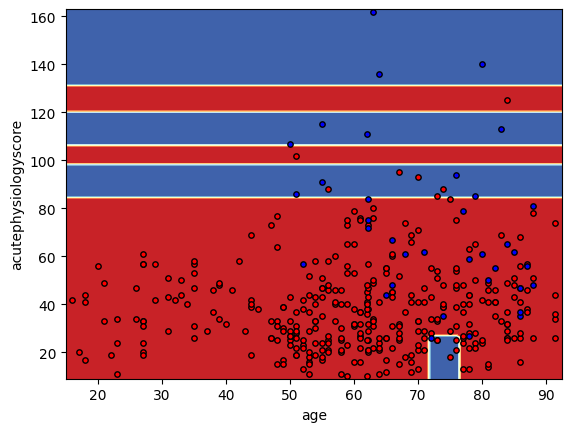

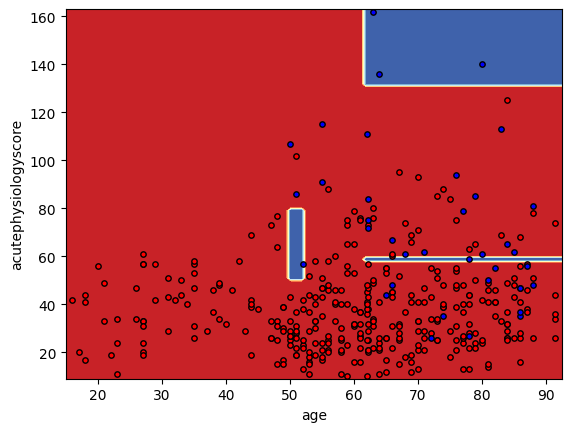

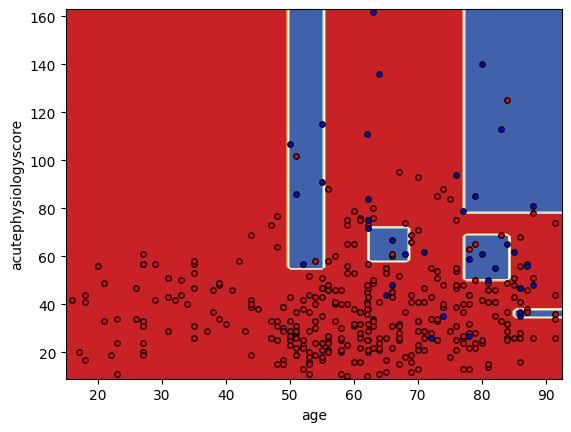

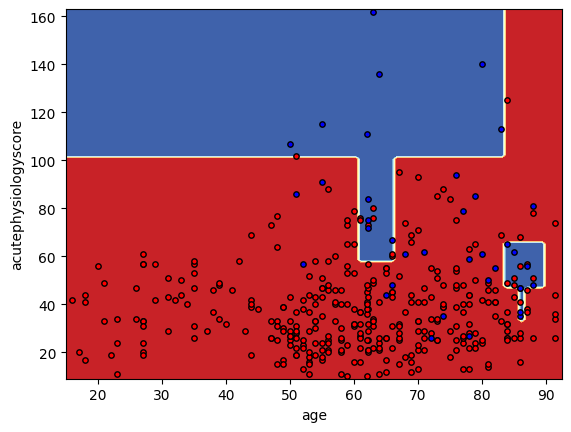

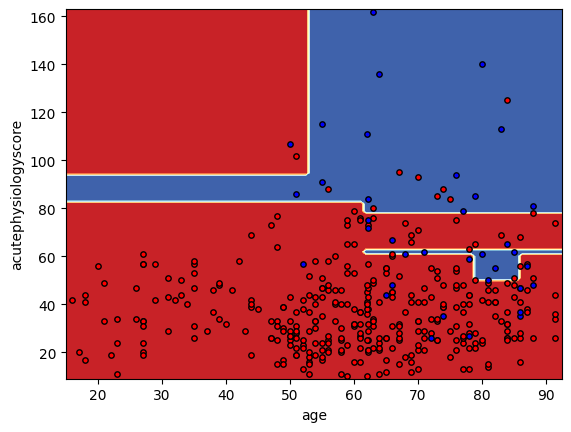

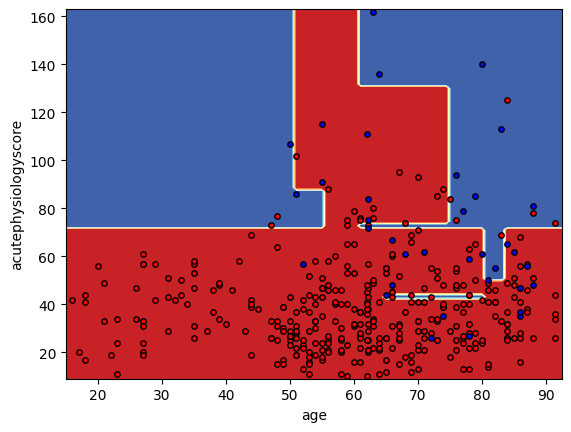

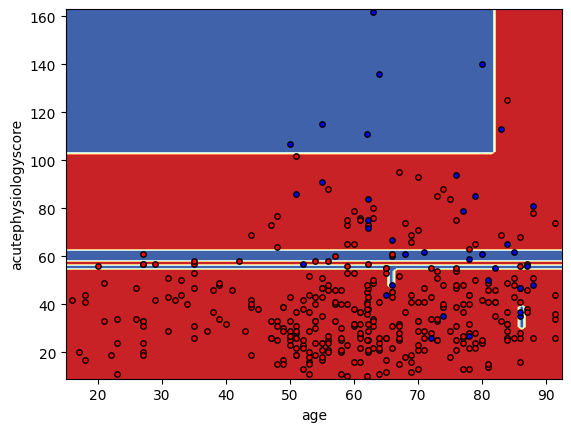

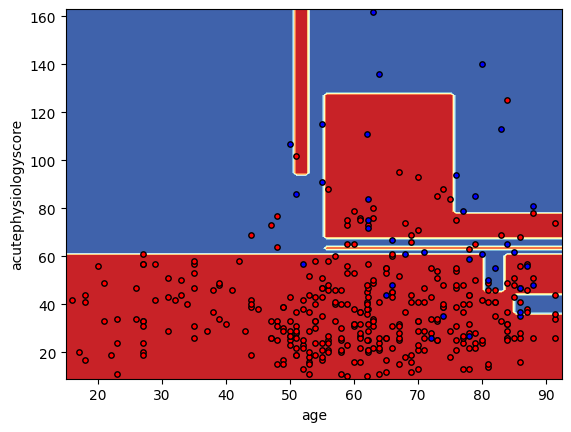

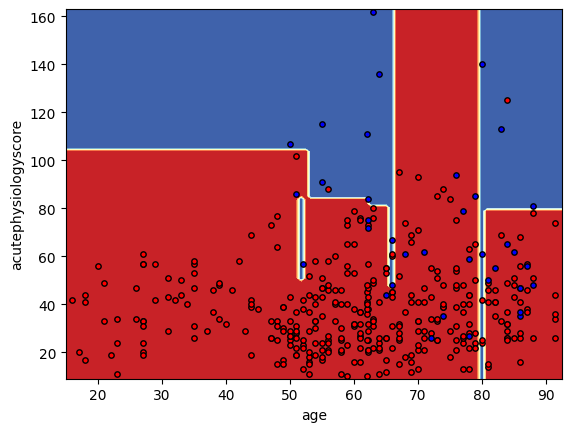

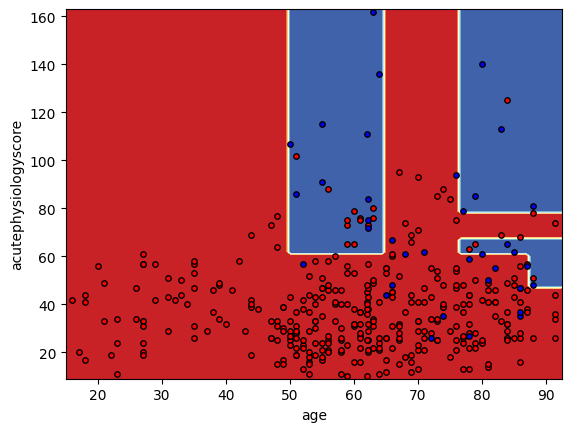

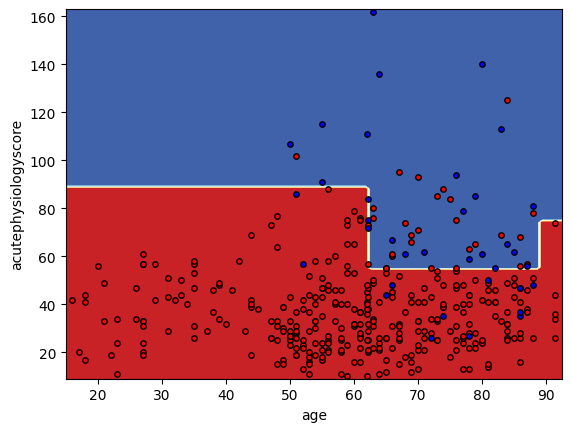

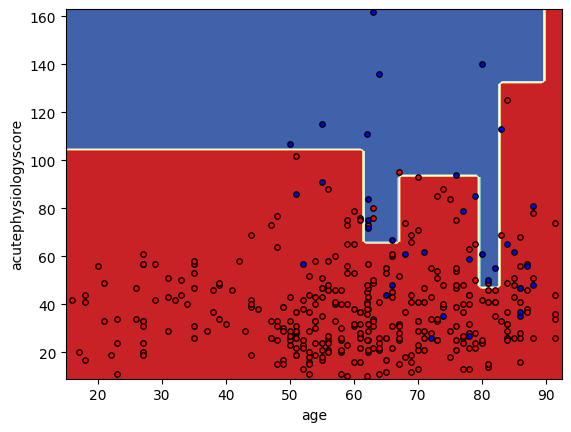

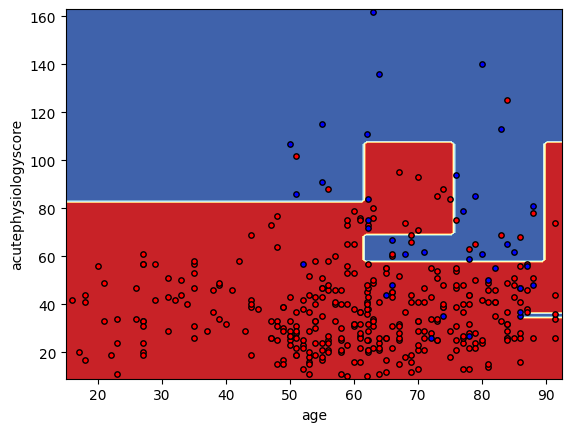

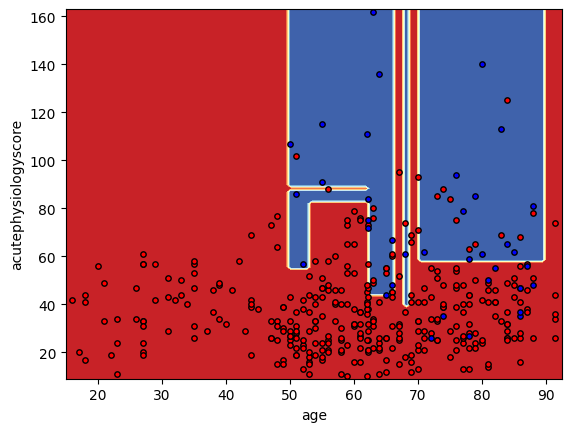

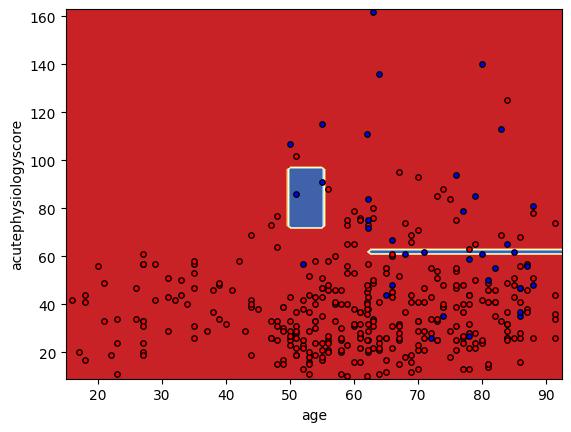

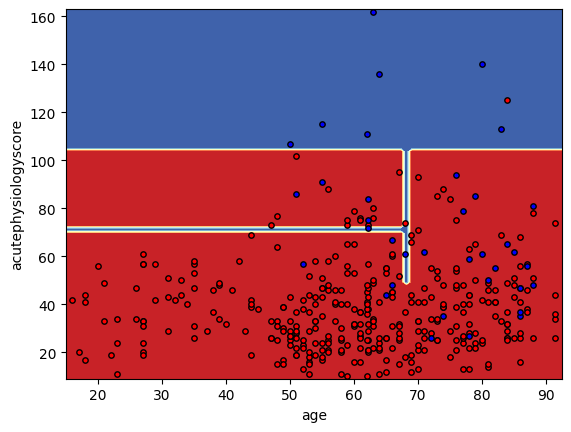

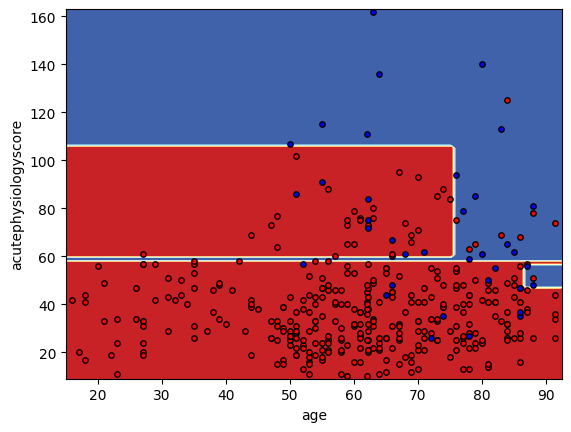

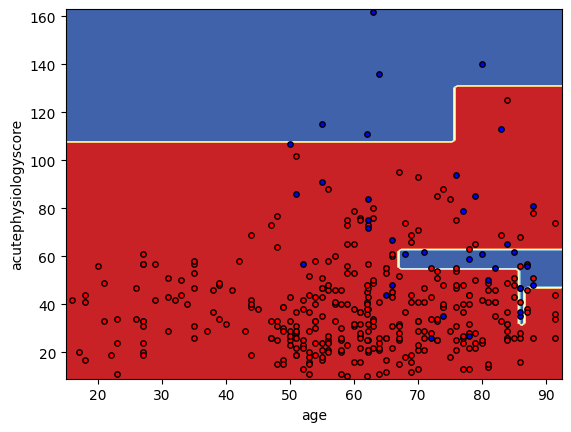

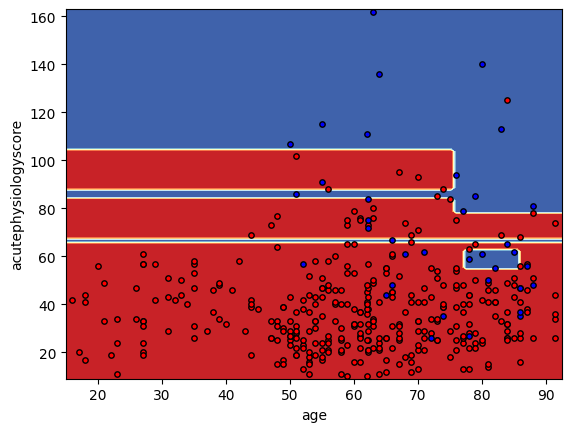

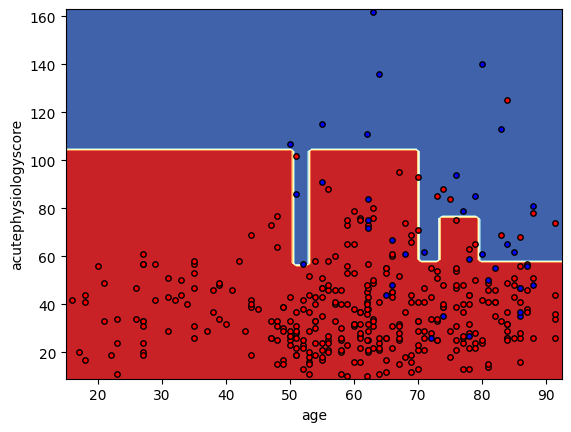

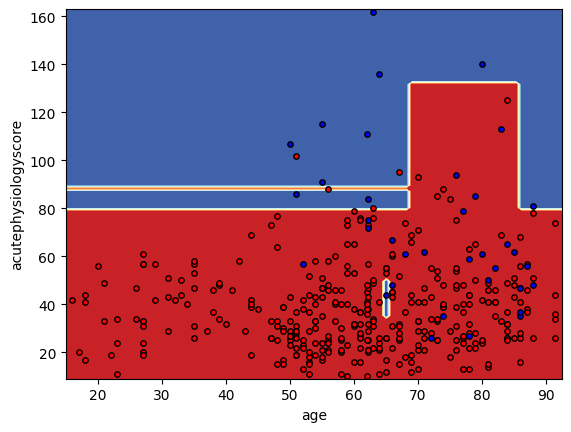

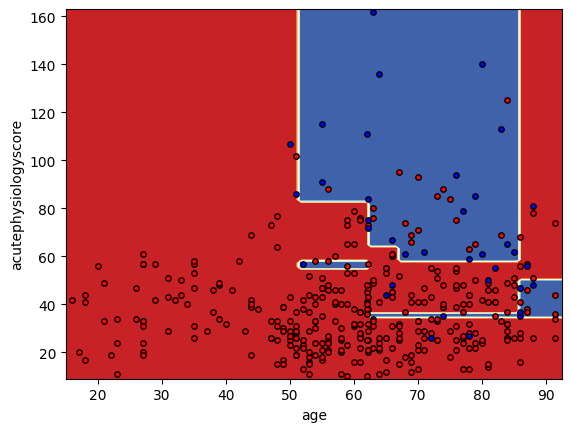

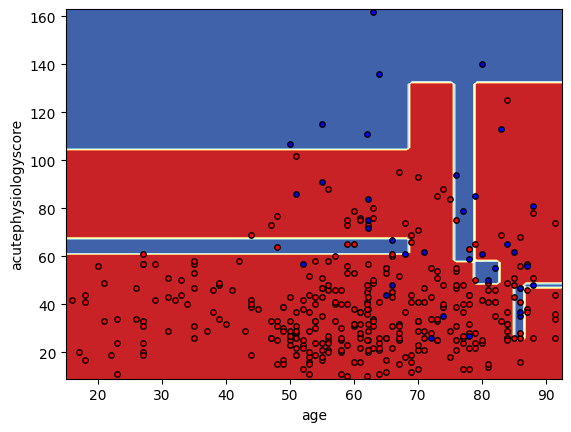

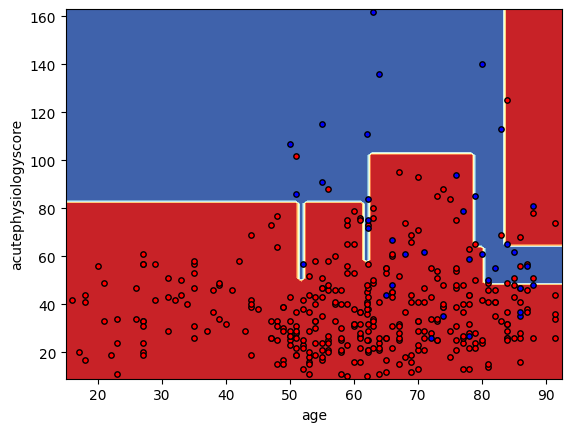

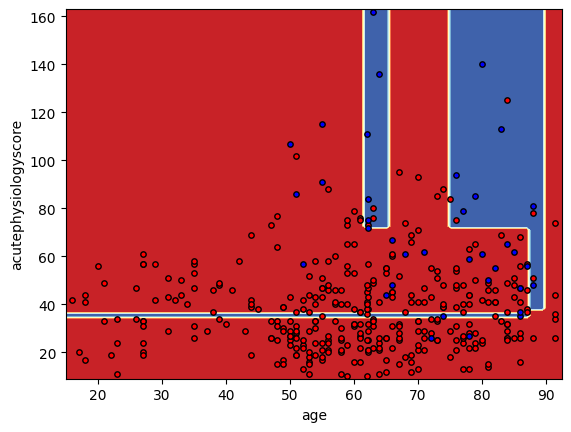

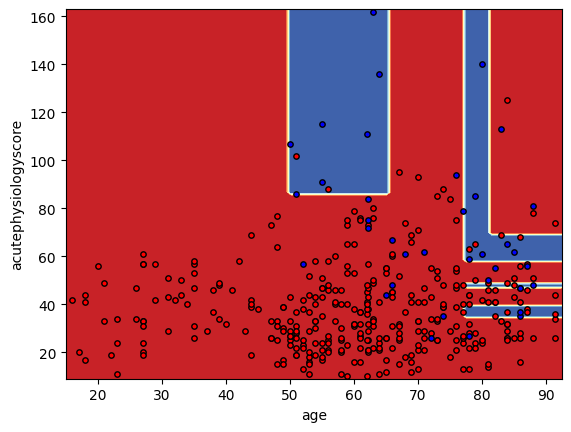

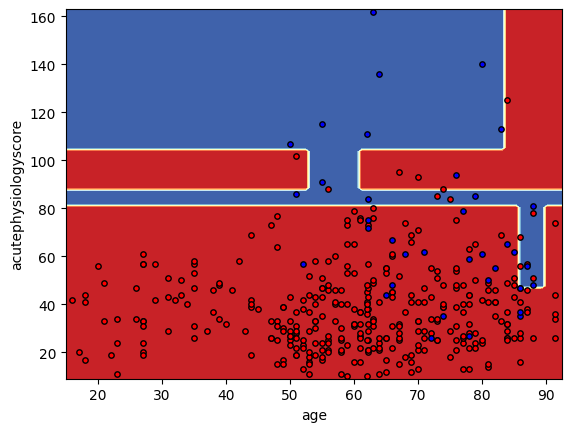

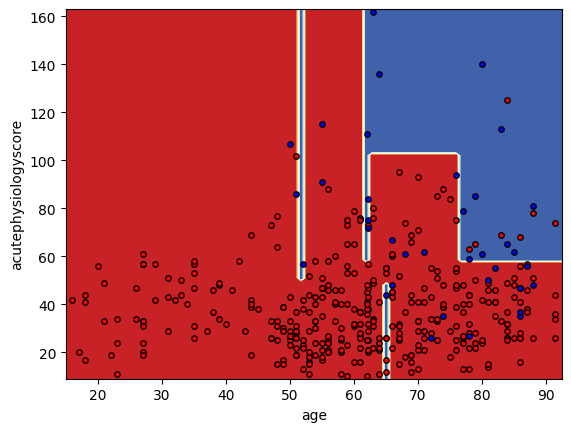

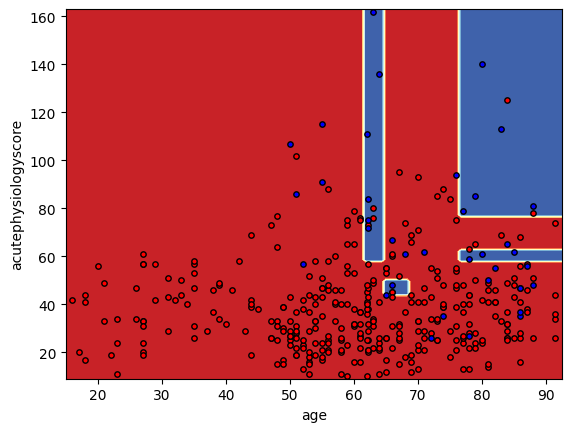

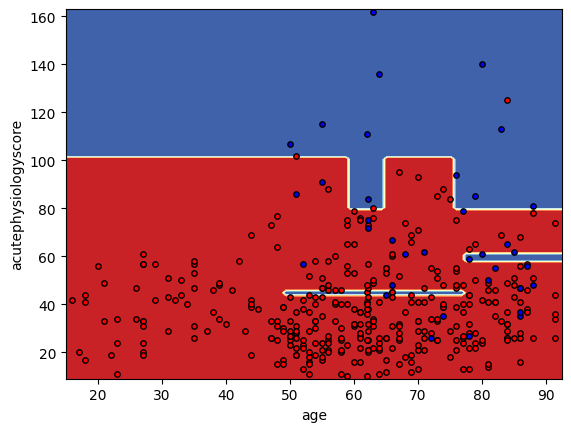

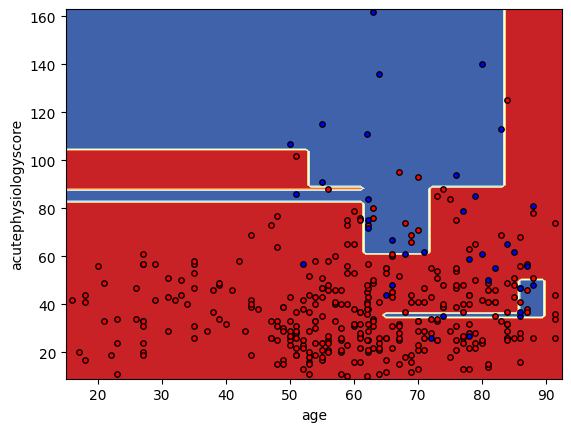

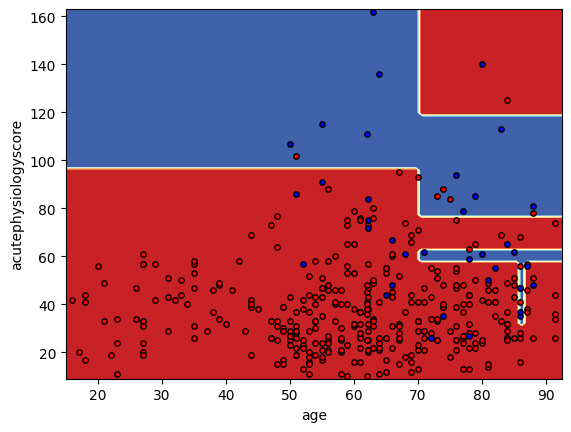

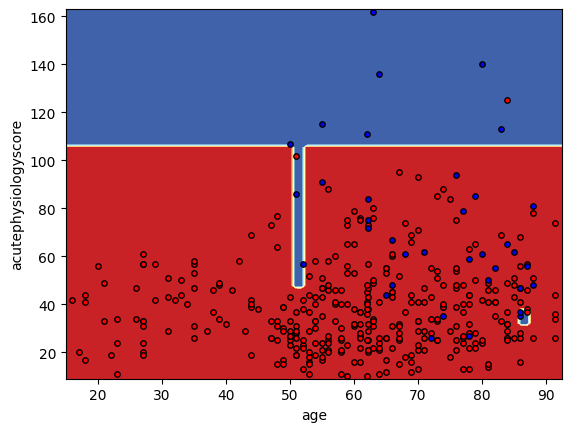

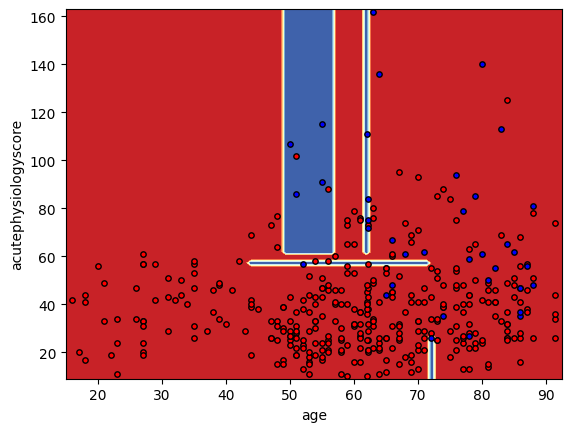

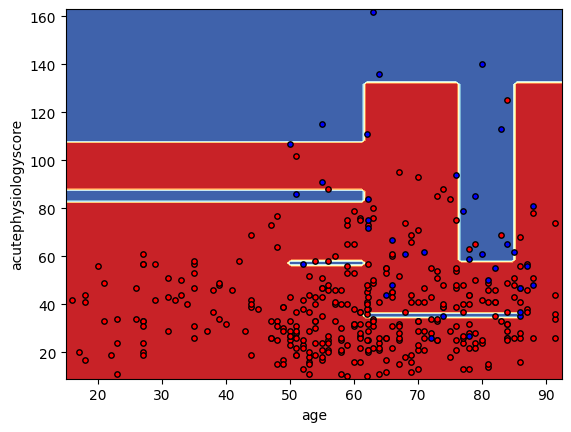

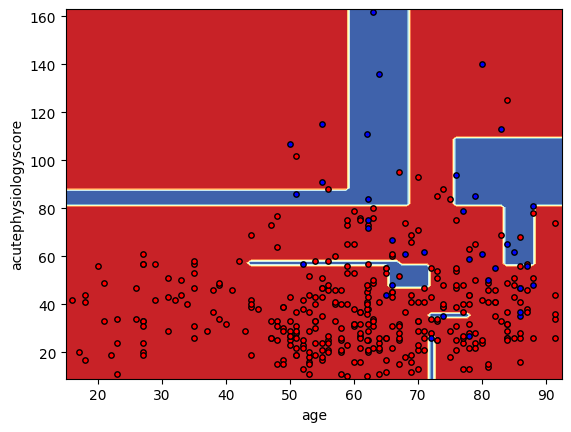

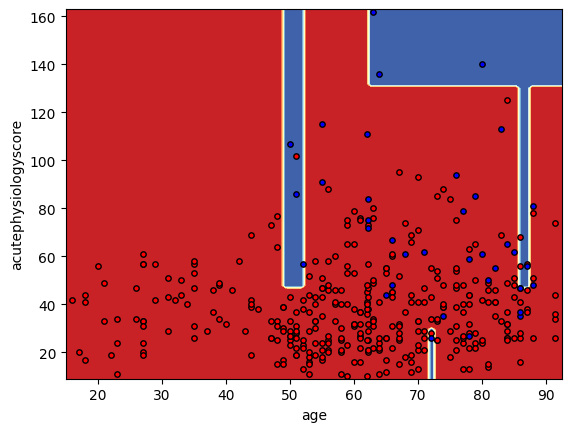

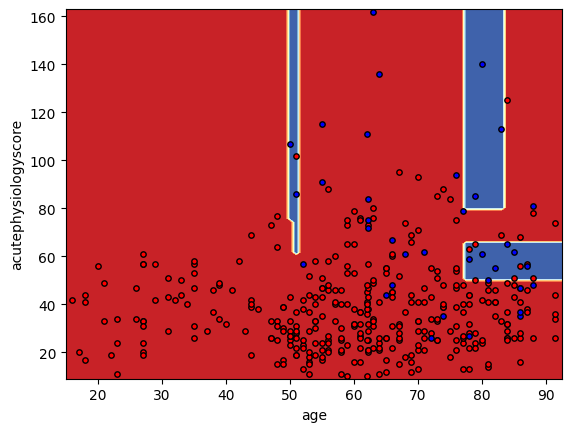

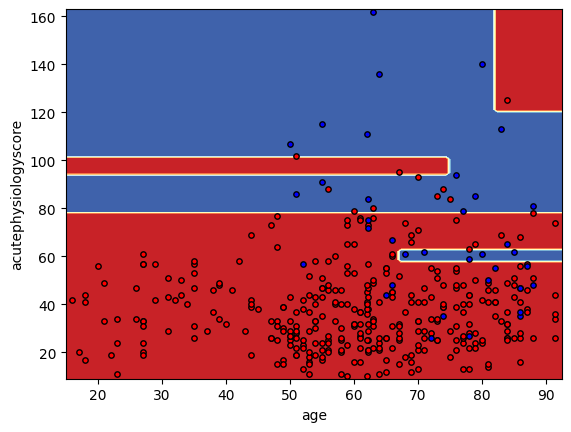

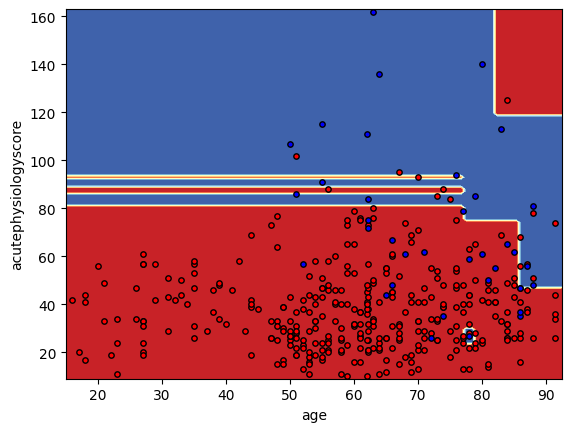

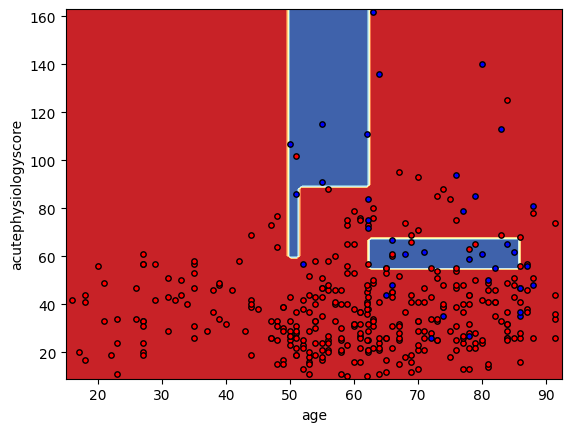

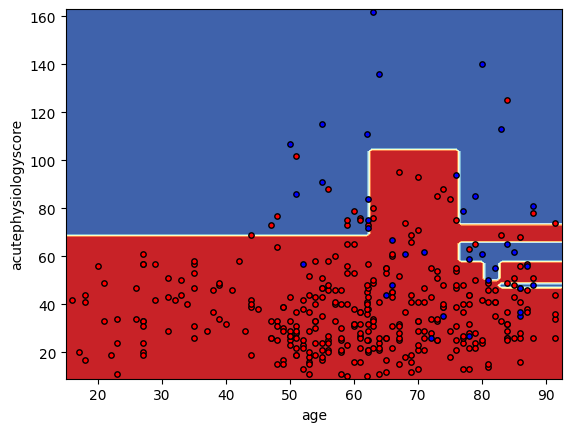

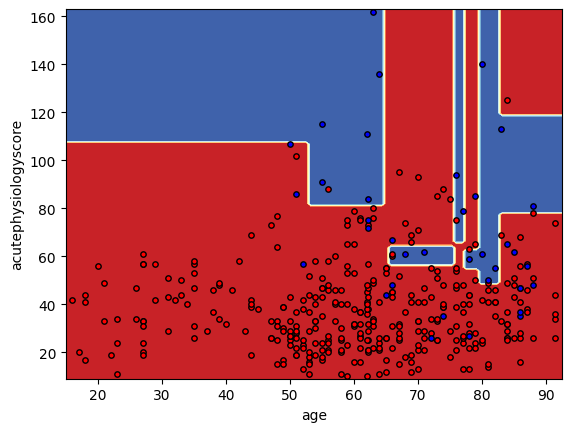

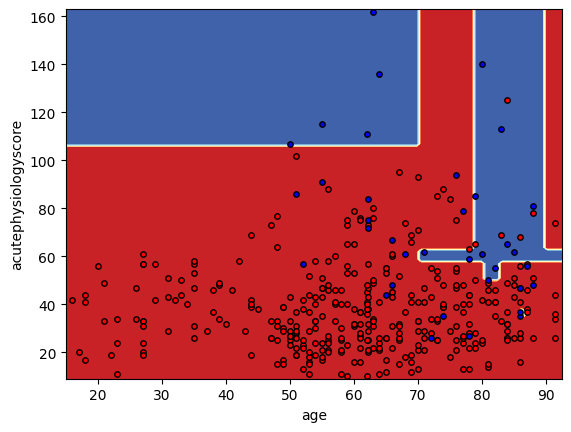

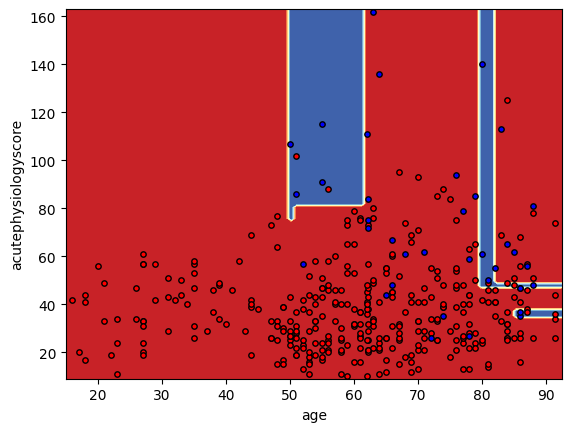

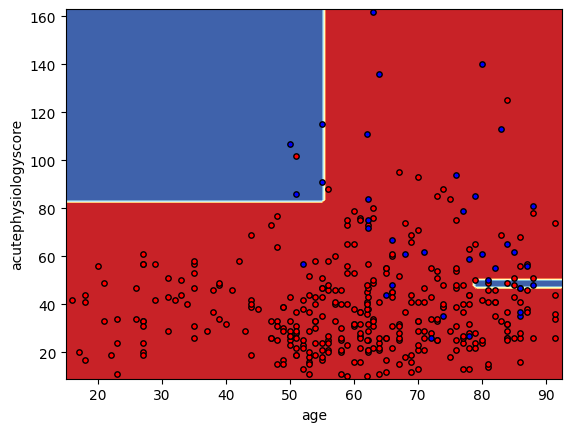

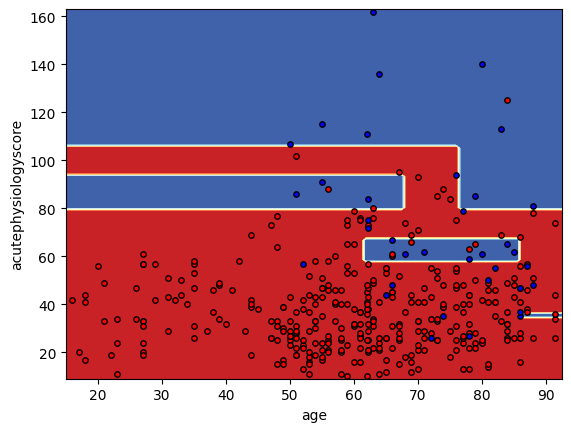

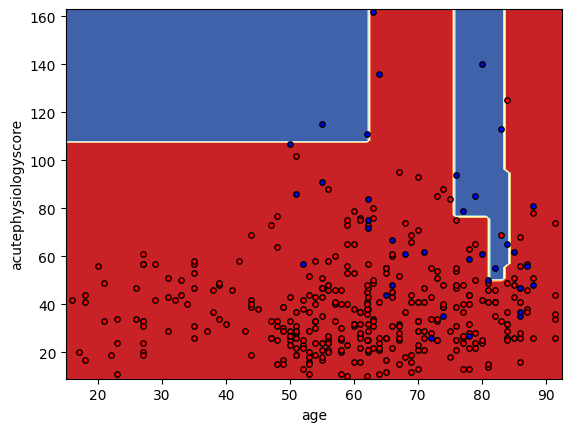

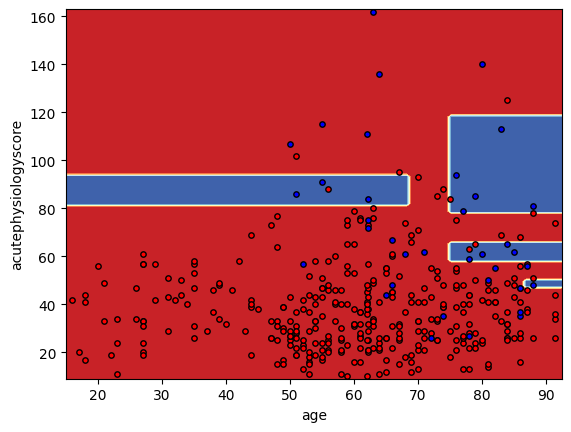

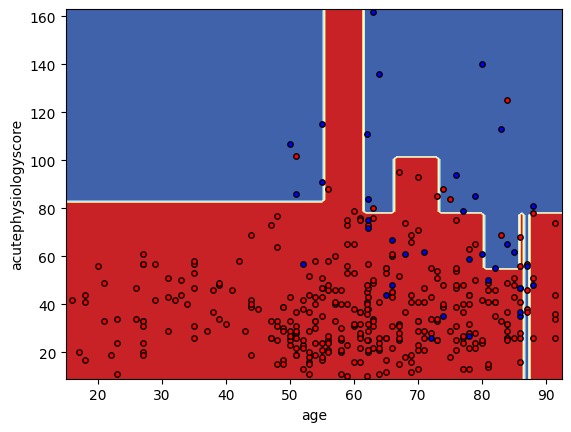

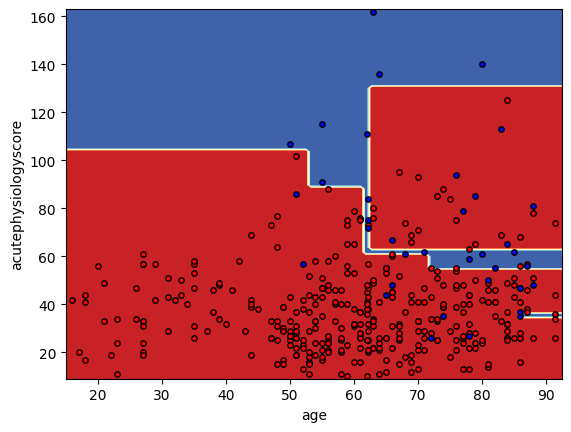

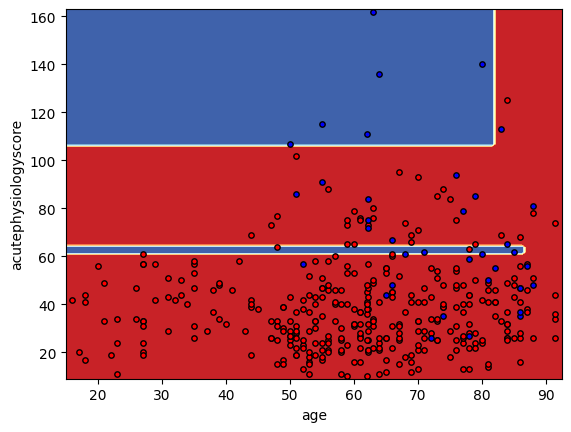

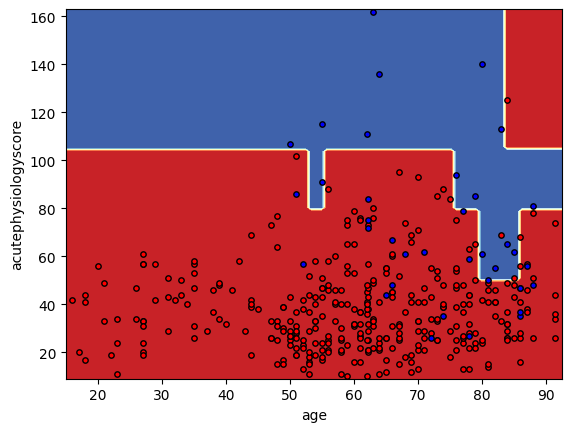

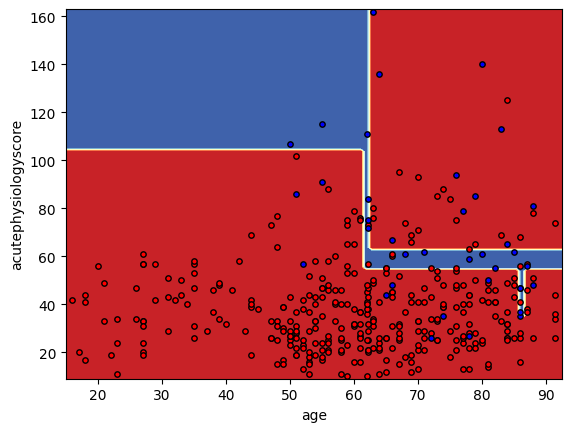

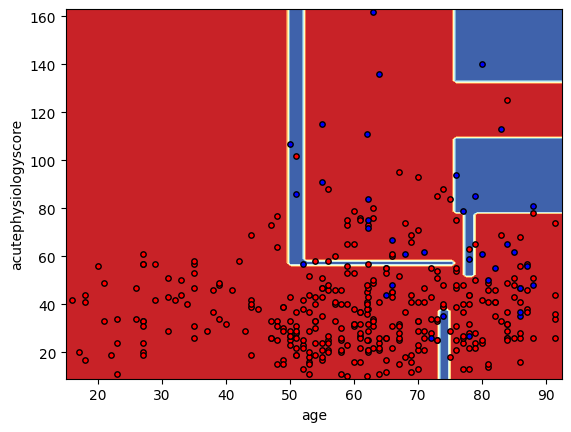

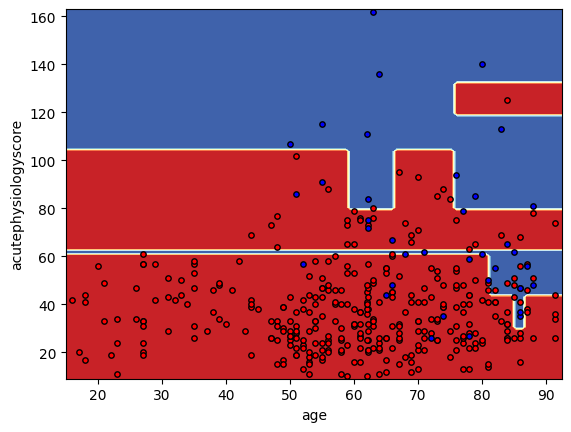

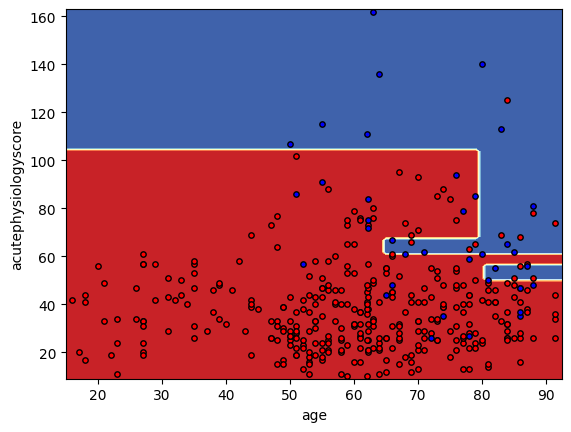

In [10]:
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

np.random.seed(321)
model = RandomForestClassifier(max_depth=5, random_state=0)
model = model.fit(x_train, y_train)

for i, estimator in enumerate(model.estimators_):    
    plot_tree_boundaries(estimator, x_train, y_train, feature_names=features, target_names=['Alive', 'Dead'])

Let's also look at the overall final model.

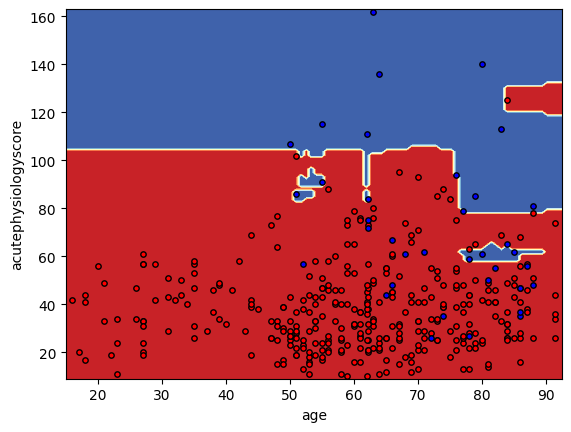

In [11]:
plot_tree_boundaries(model, x_train, y_train, feature_names=features, target_names=['Alive', 'Dead'])

Much like the bagging model, this ensembling technique creates a much more complex (and possibly accurate - we'll investigate this later) decision boundary. Random forests are a powerful technique that can be used to achieve state of the art results on some tasks - in particualr, those that involve tabular data.